In [1]:
%cd /work/adapting-CLIP-VGPs/

/work/adapting-CLIP-VGPs


In [2]:
from models.vgp_vit import VGPViT

args = {
    'model': 'vit14',
    'alpha': 0.75,
    'aggregation': 'mean',
    'n_segments': list(range(100, 601, 50)),
    'temperature': 0.02,
    'upsample': 2,
    'start_block': 0,
    'compactness': 50,
    'sigma': 0,
}

model = VGPViT(**args).cuda()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3509: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


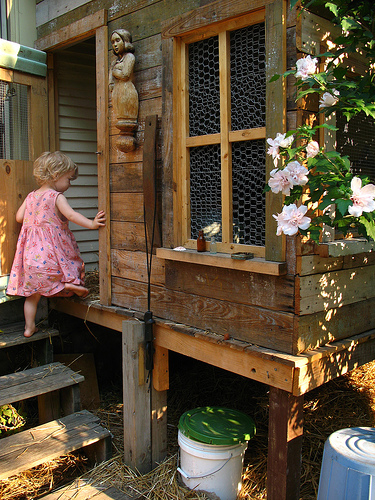

In [3]:
from PIL import Image
import numpy as np

img_path = 'data/flickr/flickr30k_images/1000268201.jpg'
img = Image.open(img_path).convert("RGB")
img_data = np.array(img)

img.show()

In [4]:
'''
Captions:
1000268201.jpg| 0| A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201.jpg| 1| A little girl in a pink dress going into a wooden cabin .
1000268201.jpg| 2| A little girl climbing the stairs to her playhouse .
1000268201.jpg| 3| A little girl climbing into a wooden playhouse 
1000268201.jpg| 4| A girl going into a wooden building .
'''
phrases = ['dress', 'pink dress']


In [5]:
heatmaps = model(img_data, phrases)

/work/adapting-CLIP-VGPs/models/vgp_vit.py:52: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  np.float32)/255., n_segments=n, compactness=self.compactness, sigma=self.sigma)


(-0.5, 223.5, 223.5, -0.5)

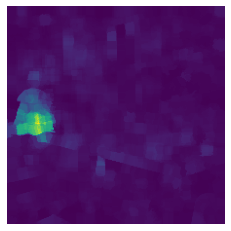

In [6]:
import matplotlib.pyplot as plt

plt.imshow(heatmaps[0])
plt.axis('off')

(-0.5, 223.5, 223.5, -0.5)

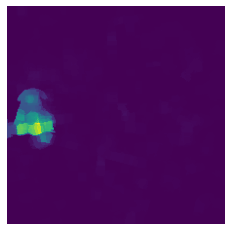

In [7]:
plt.imshow(heatmaps[1])
plt.axis('off')

In [8]:
# from models.resnet_high_res import ResNetHighRes

# args = {
#     'model': 'RN50',
#     'alpha': 0.7,
#     'temperature': 0.03,
# }

# model = ResNetHighRes(**args).cuda()

# heatmaps = [model(img_data, text) for text in phrases]

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

# plt.imshow(np.abs(heatmaps[0]-heatmaps[1]))
# mask = np.abs(heatmaps[0]-heatmaps[1]) > 0.5
# np.sum(mask)

similarity_score = cosine_similarity(heatmaps[0].reshape(1, -1), heatmaps[1].reshape(1, -1))[0, 0]
print(similarity_score)

0.9118138


/work/adapting-CLIP-VGPs/models/vgp_vit.py:52: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  np.float32)/255., n_segments=n, compactness=self.compactness, sigma=self.sigma)


(-0.5, 223.5, 223.5, -0.5)

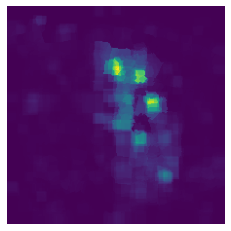

In [10]:
img_path = 'data/flickr/flickr30k_images/1016887272.jpg'
img = Image.open(img_path).convert("RGB")
img_data = np.array(img)
# img.show()

phrases = ['Several climbers', 'A group of people']
heatmaps = model(img_data, phrases)

import matplotlib.pyplot as plt

plt.imshow(heatmaps[0])
plt.axis('off')

0.57725275


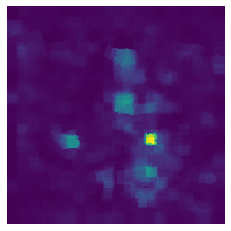

In [11]:
plt.imshow(heatmaps[1])
plt.axis('off')

from sklearn.metrics.pairwise import cosine_similarity

similarity_score = cosine_similarity(heatmaps[0].reshape(1, -1), heatmaps[1].reshape(1, -1))[0, 0]
print(similarity_score)

/work/adapting-CLIP-VGPs/models/vgp_vit.py:52: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  np.float32)/255., n_segments=n, compactness=self.compactness, sigma=self.sigma)


(-0.5, 223.5, 223.5, -0.5)

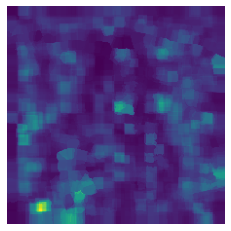

In [12]:
img_path = 'data/flickr/flickr30k_images/1016887272.jpg'
img = Image.open(img_path).convert("RGB")
img_data = np.array(img)
# img.show()

phrases = ['the beach', 'the ocean']
heatmaps = model(img_data, phrases)

import matplotlib.pyplot as plt

plt.imshow(heatmaps[0])
plt.axis('off')

0.8461559


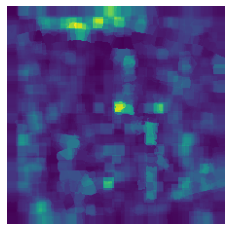

In [13]:
plt.imshow(heatmaps[1])
plt.axis('off')

from sklearn.metrics.pairwise import cosine_similarity

similarity_score = cosine_similarity(heatmaps[0].reshape(1, -1), heatmaps[1].reshape(1, -1))[0, 0]
print(similarity_score)

/work/adapting-CLIP-VGPs/models/vgp_vit.py:52: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  np.float32)/255., n_segments=n, compactness=self.compactness, sigma=self.sigma)


(-0.5, 223.5, 223.5, -0.5)

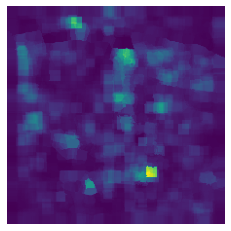

In [14]:
img_path = 'data/flickr/flickr30k_images/1016887272.jpg'
img = Image.open(img_path).convert("RGB")
img_data = np.array(img)
# img.show()

phrases = ['Two children', 'Two young , wet boys']
heatmaps = model(img_data, phrases)

import matplotlib.pyplot as plt

plt.imshow(heatmaps[0])
plt.axis('off')

(-0.5, 223.5, 223.5, -0.5)

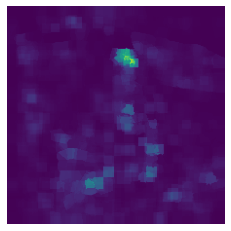

In [15]:
plt.imshow(heatmaps[1])
plt.axis('off')

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_score = cosine_similarity(heatmaps[0].reshape(1, -1), heatmaps[1].reshape(1, -1))[0, 0]
print(similarity_score)

0.7546612
